# **Feedforward NN: Overfitting and Underfitting**

---




## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia

## Importing Modules


In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

seed = 7
numpy.random.seed(seed)


### Bring in Data, check the data

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
Y_train[13]

6

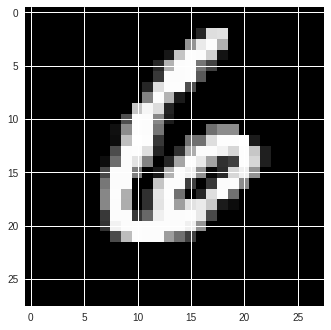

6


In [ ]:


plt.imshow(X_train[13], cmap=plt.get_cmap('gray'))
plt.show()
print(Y_train[13])





## Perform required preprocessing, and make it ready for machine learning algorithim.

In [ ]:
num_of_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_of_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_of_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255




In [ ]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]




Using TensorFlow backend.


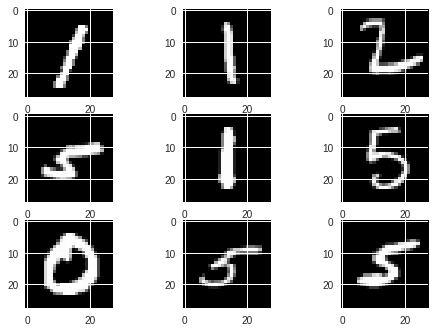

In [ ]:
Y_test.shape


In [ ]:
print(Y_train[13])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Trying a random model on test and training data

In [ ]:
seed = 45
numpy.random.seed(seed)

my_model = Sequential()
my_model.add(Dense(20, input_dim=num_of_pixels, activation='relu'))
my_model.add(Dense(num_classes, activation='softmax'))

my_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [ ]:
scores = my_model.evaluate(X_train, Y_train, verbose=0)
print("Accuracy on training data: %.2f%%" % (scores[1]*100))

scores = my_model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on training data: 9.11%
Accuracy on test data: 9.23%


## A model with low learning capacity that is Underfitting

In [ ]:
underfitting_model = Sequential()
underfitting_model.add(Dense(2, input_dim=num_of_pixels, activation='relu'))
underfitting_model.add(Dense(num_classes, activation='softmax'))
underfitting_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

performance_over_epochs_underfitting_model=underfitting_model.fit(X_train, Y_train, epochs=60, validation_data=(X_test, Y_test),batch_size=100, verbose=0)# it is not a good practice to look at the test data during training.
                                                                                                                                                           #We use validation set for that purpose. That being said, in this specific case we just wanted to visualize performance difference between test and training
                                                                                                                                                            # to visualize underfitting. Otherwise, this is a no no when you are actucally trying to train a model
                                                                                                                 


In [ ]:
print(performance_over_epochs_underfitting_model.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


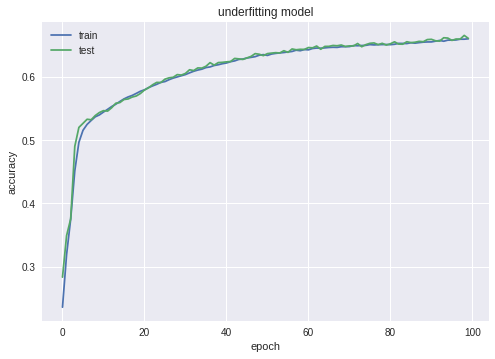

In [ ]:
plt.plot(performance_over_epochs_underfitting_model.history['acc'])
plt.plot(performance_over_epochs_underfitting_model.history['val_acc'])
plt.title('underfitting model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## A model with high learning capacity (that slightly Overfits)

In [ ]:
overfitting_model = Sequential()
overfitting_model.add(Dense(150, input_dim=num_of_pixels, activation='relu'))
overfitting_model.add(Dense(150, activation='relu'))
overfitting_model.add(Dense(150,  activation='relu'))
overfitting_model.add(Dense(150,  activation='relu'))
overfitting_model.add(Dense(num_classes, activation='softmax'))
overfitting_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

performance_over_epochs_overfitting_model=overfitting_model.fit(X_train, Y_train, epochs=40, validation_data=(X_test, Y_test),batch_size=10, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/40
 - 41s - loss: 0.2253 - acc: 0.9319 - val_loss: 0.1270 - val_acc: 0.9621
Epoch 2/40
 - 40s - loss: 0.1146 - acc: 0.9671 - val_loss: 0.1156 - val_acc: 0.9678
Epoch 3/40
 - 41s - loss: 0.0887 - acc: 0.9748 - val_loss: 0.0911 - val_acc: 0.9763
Epoch 4/40
 - 41s - loss: 0.0723 - acc: 0.9793 - val_loss: 0.1249 - val_acc: 0.9721
Epoch 5/40
 - 40s - loss: 0.0625 - acc: 0.9823 - val_loss: 0.1114 - val_acc: 0.9708
Epoch 6/40
 - 41s - loss: 0.0536 - acc: 0.9846 - val_loss: 0.0943 - val_acc: 0.9752
Epoch 7/40
 - 41s - loss: 0.0494 - acc: 0.9870 - val_loss: 0.1101 - val_acc: 0.9766
Epoch 8/40
 - 40s - loss: 0.0474 - acc: 0.9870 - val_loss: 0.1198 - val_acc: 0.9739
Epoch 9/40
 - 41s - loss: 0.0424 - acc: 0.9885 - val_loss: 0.1064 - val_acc: 0.9761
Epoch 10/40
 - 40s - loss: 0.0396 - acc: 0.9898 - val_loss: 0.1058 - val_acc: 0.9783
Epoch 11/40
 - 40s - loss: 0.0374 - acc: 0.9900 - val_loss: 0.1093 - val_acc: 0.9759
Epoch 12/40
 - 41s - los

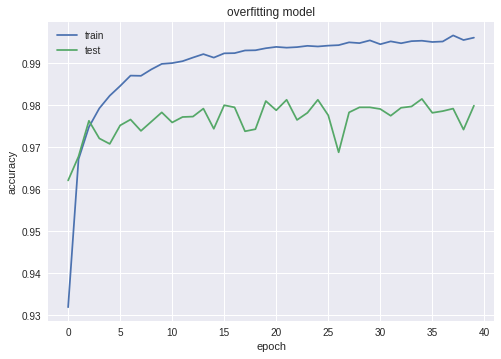

In [ ]:
plt.plot(performance_over_epochs_overfitting_model.history['acc'])
plt.plot(performance_over_epochs_overfitting_model.history['val_acc'])
plt.title('overfitting model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
overfitting_model = Sequential()
overfitting_model.add(Dense(300, input_dim=num_of_pixels, activation='relu'))
overfitting_model.add(Dense(200,  activation='relu'))
overfitting_model.add(Dense(200,  activation='relu'))
overfitting_model.add(Dense(num_classes, activation='softmax'))
overfitting_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

performance_over_epochs_overfitting_model=overfitting_model.fit(X_train, Y_train, epochs=25, validation_split=0.95,batch_size=100, verbose=2)


Train on 3000 samples, validate on 57000 samples
Epoch 1/25
 - 2s - loss: 1.0686 - acc: 0.7177 - val_loss: 0.5150 - val_acc: 0.8460
Epoch 2/25
 - 1s - loss: 0.3370 - acc: 0.8963 - val_loss: 0.3326 - val_acc: 0.9010
Epoch 3/25
 - 1s - loss: 0.2164 - acc: 0.9373 - val_loss: 0.3322 - val_acc: 0.9001
Epoch 4/25
 - 1s - loss: 0.1534 - acc: 0.9547 - val_loss: 0.2888 - val_acc: 0.9140
Epoch 5/25
 - 1s - loss: 0.0983 - acc: 0.9760 - val_loss: 0.2879 - val_acc: 0.9144
Epoch 6/25
 - 1s - loss: 0.0749 - acc: 0.9797 - val_loss: 0.2763 - val_acc: 0.9203
Epoch 7/25
 - 1s - loss: 0.0466 - acc: 0.9900 - val_loss: 0.2835 - val_acc: 0.9212
Epoch 8/25
 - 1s - loss: 0.0451 - acc: 0.9873 - val_loss: 0.2985 - val_acc: 0.9181
Epoch 9/25
 - 1s - loss: 0.0269 - acc: 0.9950 - val_loss: 0.2887 - val_acc: 0.9231
Epoch 10/25
 - 1s - loss: 0.0177 - acc: 0.9980 - val_loss: 0.2956 - val_acc: 0.9238
Epoch 11/25
 - 1s - loss: 0.0105 - acc: 0.9997 - val_loss: 0.2917 - val_acc: 0.9265
Epoch 12/25
 - 1s - loss: 0.0050 - a

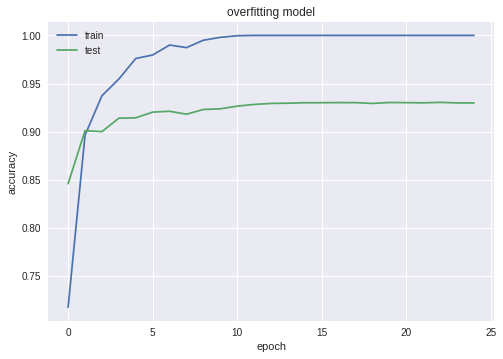

In [ ]:
plt.plot(performance_over_epochs_overfitting_model.history['acc'])
plt.plot(performance_over_epochs_overfitting_model.history['val_acc'])
plt.title('overfitting model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

![alt text](https://)## SGD vs. Adam Vs. RMSprop !



In [ ]:
seed = 7
numpy.random.seed(seed)

my_model = Sequential()
my_model.add(Dense(100, input_dim=num_of_pixels, activation='relu'))
my_model.add(Dense(100,  activation='relu'))

my_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
my_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
performance_over_epochs=my_model.fit(X_train, Y_train, epochs=10, batch_size=100, verbose=0)


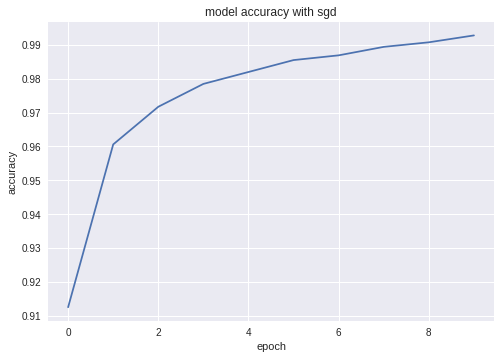

In [ ]:
plt.plot(performance_over_epochs.history['acc'])
plt.title('model accuracy with sgd')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

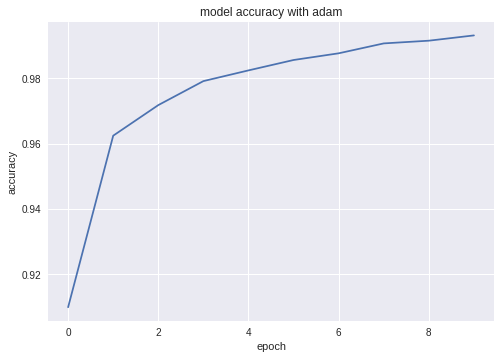

In [ ]:
seed = 7
numpy.random.seed(seed)

my_model = Sequential()
my_model.add(Dense(100, input_dim=num_of_pixels, activation='relu'))
my_model.add(Dense(100,  activation='relu'))

my_model.add(Dense(num_classes, activation='softmax'))

my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
performance_over_epochs=my_model.fit(X_train, Y_train, epochs=10, batch_size=100, verbose=0)
plt.plot(performance_over_epochs.history['acc'])
plt.title('model accuracy with adam')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

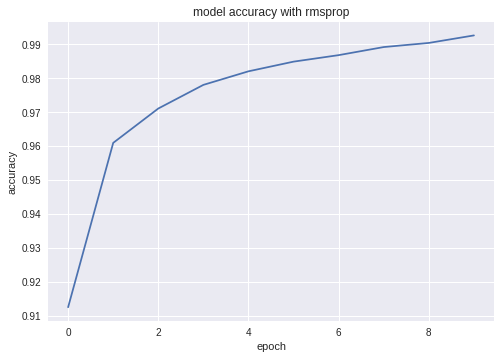

In [ ]:
seed = 7
numpy.random.seed(seed)

my_model = Sequential()
my_model.add(Dense(100, input_dim=num_of_pixels, activation='relu'))
my_model.add(Dense(100,  activation='relu'))

my_model.add(Dense(num_classes, activation='softmax'))

my_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
performance_over_epochs=my_model.fit(X_train, Y_train, epochs=10, batch_size=100, verbose=0)
plt.plot(performance_over_epochs.history['acc'])
plt.title('model accuracy with rmsprop')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()